### 20240820_Day 2

In [16]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim import lr_scheduler
import torchvision
import torchvision.transforms as transforms
from sklearn.metrics import confusion_matrix, classification_report

In [17]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(4, 5)
        self.fc2 = nn.Linear(5, 3)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)   # logits (without activation)
        return x

In [ ]:
X = torch.tensor([
    [0.1, -0.2, 0.3, -0.4],
    [0.5, 0.6, -0.7, -0.8],
    [-0.3, 0.5, -0.4, 0.2],
], dtype=torch.float32)

y_onehot = torch.tensor([
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1],
], dtype=torch.int)

model = SimpleNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

for epoch in range(1000):
    y_pred = model(X)
    loss = criterion(y_pred, torch.max(y_onehot, 1)[1])
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (epoch+1) % 50 == 0:
        print('Epoch %d: Loss: %.3f' % (epoch+1, loss))

y_hat = torch.softmax(model(X), dim=1)
print(y_hat)

In [ ]:
logits = torch.tensor([
    [1.2, -0.3, 0.5],
    [0.1, 0.7, -0.2],
    [0.3, 0.4, 1.3],
], dtype=torch.float32)
criterion = nn.CrossEntropyLoss()
criterion(logits, torch.max(y_onehot, 1)[1])

In [ ]:
### Your code here (3 lines) ###
# softmax = torch.softmax(logits, dim=1)
# log_probs = torch.log(softmax)
# y_true = torch.argmax(y_onehot, dim=1)
selected_log_probs = log_probs[range(len(y_true)), y_true]
-selected_log_probs.mean()

In [ ]:
for name, param in model.named_parameters():
    print(name, param.data)

In [1]:
from google.colab import files
uploaded = files.upload()

Saving photo.jpg to photo.jpg


In [3]:
import matplotlib.pyplot as plt

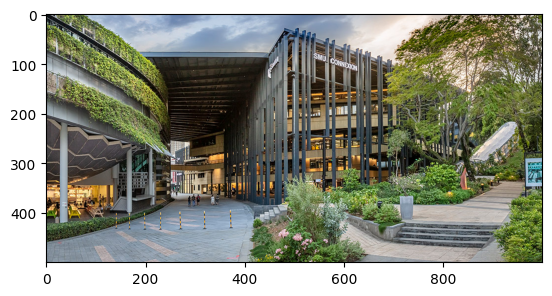

In [4]:
from PIL import Image
image = Image.open('/content/photo.jpg')

plt.imshow(image)
plt.show()

In [7]:
import numpy as np

In [8]:
image_array = np.array(image)
print(type(image_array))
print(image_array.shape)

<class 'numpy.ndarray'>
(500, 1000, 3)


array([[[ 10,  17,  23],
        [ 28,  35,  41],
        [ 75,  82,  88],
        ...,
        [ 40,  48,   0],
        [ 42,  51,   0],
        [ 55,  64,   7]],

       [[  5,  12,  18],
        [ 13,  20,  26],
        [ 14,  21,  27],
        ...,
        [ 84,  91,  50],
        [ 48,  56,   9],
        [ 82,  90,  39]],

       [[ 19,  24,  30],
        [  9,  14,  20],
        [  7,  14,  20],
        ...,
        [ 90,  97,  64],
        [ 40,  48,   7],
        [105, 114,  67]],

       ...,

       [[140, 153, 162],
        [136, 149, 158],
        [105, 117, 129],
        ...,
        [ 37,  58,  15],
        [ 45,  70,  28],
        [ 94, 121,  80]],

       [[138, 151, 160],
        [127, 140, 149],
        [ 98, 110, 122],
        ...,
        [ 78, 100,  61],
        [ 59,  85,  46],
        [ 66,  94,  56]],

       [[135, 148, 157],
        [121, 134, 143],
        [ 96, 108, 120],
        ...,
        [100, 125,  85],
        [ 71,  97,  62],
        [ 54,  81,  48]]], dtype=uint8)
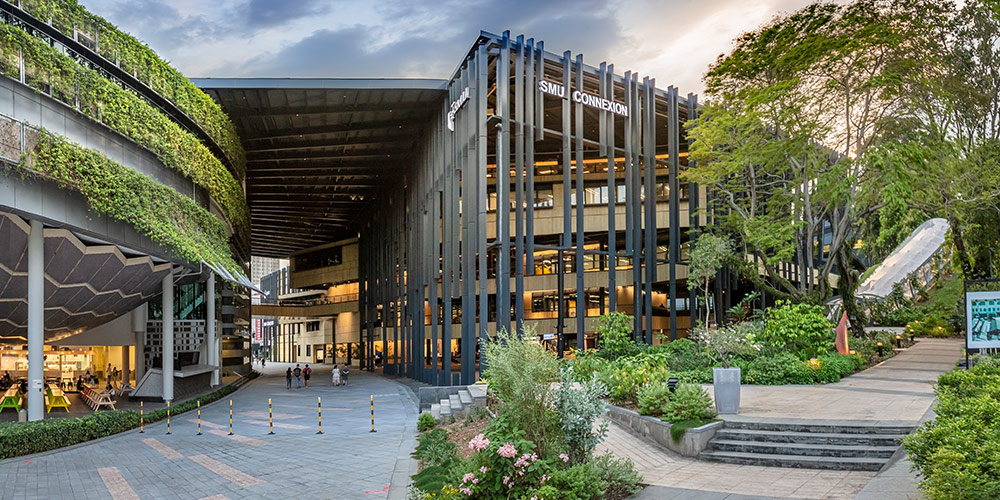

In [9]:
image_array

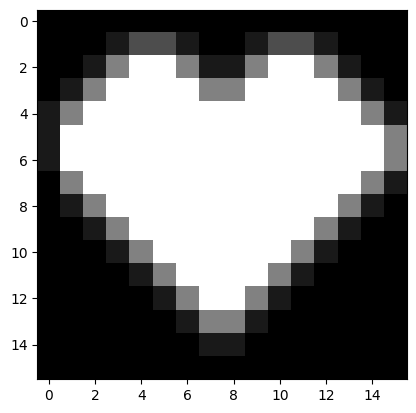

In [10]:
heart_shape = [
    [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
    [ 0,  0,  0, 10, 30, 30, 10,  0,  0, 10, 30, 30, 10,  0,  0,  0],
    [ 0,  0, 10, 50, 99, 99, 50, 10, 10, 50, 99, 99, 50, 10,  0,  0],
    [ 0, 10, 50, 99, 99, 99, 99, 50, 50, 99, 99, 99, 99, 50, 10,  0],
    [10, 50, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 50, 10],
    [10, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 50],
    [10, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 50],
    [ 0, 50, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 50, 10],
    [ 0, 10, 50, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 50, 10,  0],
    [ 0,  0, 10, 50, 99, 99, 99, 99, 99, 99, 99, 99, 50, 10,  0,  0],
    [ 0,  0,  0, 10, 50, 99, 99, 99, 99, 99, 99, 50, 10,  0,  0,  0],
    [ 0,  0,  0,  0, 10, 50, 99, 99, 99, 99, 50, 10,  0,  0,  0,  0],
    [ 0,  0,  0,  0,  0, 10, 50, 99, 99, 50, 10,  0,  0,  0,  0,  0],
    [ 0,  0,  0,  0,  0,  0, 10, 50, 50, 10,  0,  0,  0,  0,  0,  0],
    [ 0,  0,  0,  0,  0,  0,  0, 10, 10,  0,  0,  0,  0,  0,  0,  0],
    [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
]
plt.imshow(heart_shape, cmap='gray')

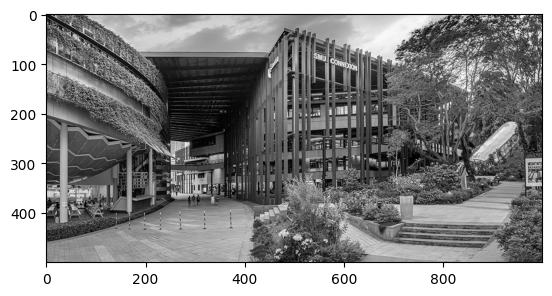

In [11]:
from scipy.ndimage import convolve

sobel_x = np.array(
    [[-1, 0, 1],
     [-2, 0, 2],
     [-1, 0, 1]]
)
sobel_y = np.array(
    [[1,  2,  1],
     [0,  0,  0],
     [-1, -2, -1]]
)

grayscale_image = np.mean(image_array, axis=2)

plt.imshow(grayscale_image, cmap='gray')

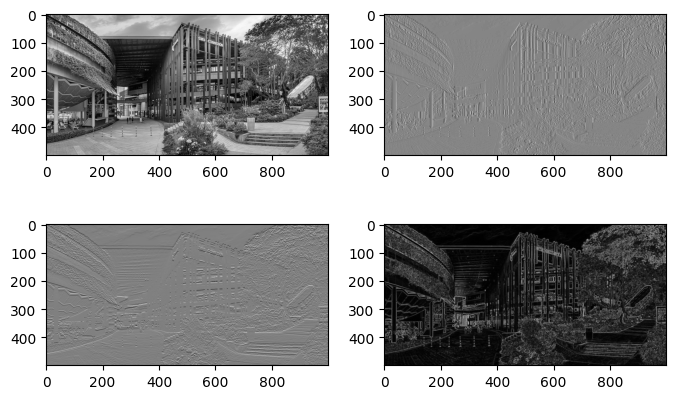

In [13]:
### Your code here (3 lines) ###
Gx = convolve(grayscale_image, sobel_x)
Gy = convolve(grayscale_image, sobel_y)
gradient_magnitude = np.sqrt(Gx**2 + Gy**2)

fig, axes = plt.subplots(2,2,figsize=(8,5))
axes[0,0].imshow(grayscale_image, cmap='gray')
axes[0,1].imshow(Gx, cmap='gray')
axes[1,0].imshow(Gy, cmap='gray')
axes[1,1].imshow(gradient_magnitude, cmap='gray')
plt.show()

In [21]:
torch.manual_seed(2024)
np.random.seed(2024)

def check_cuda():
    try:
        print(torch.cuda.is_available())
        device = torch.cuda.current_device()
        print(torch.cuda.device(device))
        print(torch.cuda.get_device_name(device))
        print("Completed checking CUDA")
    except Exception as e:
        print(e)

In [22]:
check_cuda()

True
Tesla T4
Completed checking CUDA


In [20]:
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

In [23]:
class DataManager:
    def __init__(self):
        self.C, self.H, self.W = 3, 32, 32
        self.batch_size = 64
        self.transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize(mean, std)
        ])
        self.trainset = torchvision.datasets.CIFAR10(
            root=".", train=True,
            download=True, transform=self.transform
        )
        self.testset = torchvision.datasets.CIFAR10(
            root=".", train=False,
            download=True, transform=self.transform
        )
        self.class_to_idx = self.trainset.class_to_idx
        self.classes = list(self.class_to_idx.keys())

        self.trainloader = torch.utils.data.DataLoader(
            self.trainset, batch_size=self.batch_size,
            shuffle=True, num_workers=0
        )
        ### Your code here ###
        self.testloader = torch.utils.data.DataLoader(
            self.testset, batch_size=self.batch_size,
            shuffle=False, num_workers=0
        )

In [24]:
dataset = DataManager()

100%|██████████| 170498071/170498071 [00:02<00:00, 72663042.17it/s]


Extracting ./cifar-10-python.tar.gz to .
Files already downloaded and verified


In [29]:
class BasicNet(nn.Module):
    def __init__(self, input_shape, num_classes):
        super().__init__()
        C, H, W = input_shape
        self.conv1 = nn.Conv2d(C, 16, 3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        ### Your code here (1 line) ###
        #self.relu = nn.ReLU()
        self.relu = nn.ELU()
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(32*8*8, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, num_classes)


    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.pool(x)
        ### Your code here (1 line) ###
        x = self.relu(self.conv2(x))
        x = self.pool(x)
        x = torch.flatten(x, 1)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)   # logits (without activation)
        return x


class Classifier:
    def __init__(self, dataMananger):
        self.dataMananger = dataMananger
        self.trainloader = self.dataMananger.trainloader
        self.testloader = self.dataMananger.testloader
        self.classes = self.dataMananger.classes
        self.device = torch.device(
            torch.cuda.current_device() if torch.cuda.is_available() else 'cpu'
        )
        print("Using device %s" % self.device)

        input_shape = (self.dataMananger.C, self.dataMananger.H, self.dataMananger.W)
        self.model = BasicNet(
            input_shape, num_classes=len(self.classes)
        )
        self.model.to(self.device)
        self.loss_function = nn.CrossEntropyLoss()


    def train(self, epochs=1, lr=1e-3, save=True, overfit=False):
        self.lr = lr
        self.optimizer = optim.Adam(self.model.parameters(), lr=self.lr)

        print("Beginning training for %d epochs" % epochs)
        self.model.train()
        for epoch in range(epochs):
            for i, data in enumerate(self.trainloader):
                images, y_true = data
                images, y_true = images.to(self.device), y_true.to(self.device)

                ### Your code here (2 lines) ###
                self.optimizer.zero_grad()
                outputs = self.model(images)
                loss = self.loss_function(outputs, y_true)
                loss.backward()
                torch.nn.utils.clip_grad_norm_(self.model.parameters(), max_norm=1)
                self.optimizer.step()

                if (i+1) % 100 == 0:
                    print("Epoch %d Batch %d -- loss: %.3f" % (epoch+1, i+1, loss))


    def test(self, on_train_set=False):
        holder = {}
        holder['y_true'], holder['y_hat'] = [], []

        if on_train_set is True:
            print("Predicting on train set to get metrics")
            dataloader = self.trainloader
        else:
            print("Predicting on eval set to get metrics")
            dataloader = self.testloader

        ### Your code here (1 line) ###
        self.model.eval()
        with torch.no_grad():
            for data in dataloader:
                images, y_true = data
                images, y_true = images.to(self.device), y_true.to(self.device)

                outputs = self.model(images)
                _, y_hat = torch.max(outputs, 1)   # logits not required, index pos is sufficient
                holder['y_true'].extend(
                    list(y_true.cpu().detach().numpy())
                )
                holder['y_hat'].extend(
                    list(y_hat.cpu().detach().numpy())
                )

        y_true_all = holder['y_true']
        y_pred_all = holder['y_hat']
        M = confusion_matrix(y_true_all, y_pred_all)
        print("Confusion matrix: \n", M)
        print(classification_report(y_true_all, y_pred_all))

In [30]:
classifier = Classifier(dataset)
classifier.train(lr=1e-4, epochs=5)

Using device cuda:0
Beginning training for 5 epochs
Epoch 1 Batch 100 -- loss: 1.916
Epoch 1 Batch 200 -- loss: 1.816
Epoch 1 Batch 300 -- loss: 1.939
Epoch 1 Batch 400 -- loss: 1.824
Epoch 1 Batch 500 -- loss: 1.341
Epoch 1 Batch 600 -- loss: 1.432
Epoch 1 Batch 700 -- loss: 1.457
Epoch 2 Batch 100 -- loss: 1.297
Epoch 2 Batch 200 -- loss: 1.473
Epoch 2 Batch 300 -- loss: 1.395
Epoch 2 Batch 400 -- loss: 1.344
Epoch 2 Batch 500 -- loss: 1.281
Epoch 2 Batch 600 -- loss: 1.417
Epoch 2 Batch 700 -- loss: 1.513
Epoch 3 Batch 100 -- loss: 1.241
Epoch 3 Batch 200 -- loss: 1.258
Epoch 3 Batch 300 -- loss: 1.074
Epoch 3 Batch 400 -- loss: 1.137
Epoch 3 Batch 500 -- loss: 1.211
Epoch 3 Batch 600 -- loss: 1.220
Epoch 3 Batch 700 -- loss: 1.138
Epoch 4 Batch 100 -- loss: 1.114
Epoch 4 Batch 200 -- loss: 1.274
Epoch 4 Batch 300 -- loss: 1.003
Epoch 4 Batch 400 -- loss: 1.157
Epoch 4 Batch 500 -- loss: 1.119
Epoch 4 Batch 600 -- loss: 1.292
Epoch 4 Batch 700 -- loss: 1.294
Epoch 5 Batch 100 -- los

In [31]:
classifier.test(on_train_set=True)

Predicting on train set to get metrics
Confusion matrix: 
 [[3479  135  228  109   93   92   74  137  357  296]
 [ 212 3566   40   51   23   34  106   83  137  748]
 [ 447   47 2488  252  339  567  442  244   95   79]
 [ 101   45  429 1670  221 1550  499  277   89  119]
 [ 215   30  711  204 2224  416  524  564   47   65]
 [  46   24  372  569  167 3147  208  369   40   58]
 [  44   40  363  230  222  239 3679   81   40   62]
 [  74   20  195  174  266  526  104 3495   18  128]
 [ 621  279   79   60   29   85   58   28 3498  263]
 [ 183  581   45   87   19   66  127  203  104 3585]]
              precision    recall  f1-score   support

           0       0.64      0.70      0.67      5000
           1       0.75      0.71      0.73      5000
           2       0.50      0.50      0.50      5000
           3       0.49      0.33      0.40      5000
           4       0.62      0.44      0.52      5000
           5       0.47      0.63      0.54      5000
           6       0.63      0.

In [32]:
classifier.test(on_train_set=False)

Predicting on eval set to get metrics
Confusion matrix: 
 [[688  20  49  26   8  20  30  19  77  63]
 [ 40 692  14   8   0   5  19  14  26 182]
 [ 92   9 465  47  76 113  97  62  20  19]
 [ 23  11  81 328  55 280 108  70  19  25]
 [ 34   8 162  46 402  87 120 115  18   8]
 [ 15   2  83 128  30 613  33  67  17  12]
 [  6   7  77  51  31  55 740  11   9  13]
 [ 19   4  34  35  48 118  28 685   3  26]
 [116  62  13  19   7  20  11   7 688  57]
 [ 43 132  11  18   7  15  20  49  30 675]]
              precision    recall  f1-score   support

           0       0.64      0.69      0.66      1000
           1       0.73      0.69      0.71      1000
           2       0.47      0.47      0.47      1000
           3       0.46      0.33      0.38      1000
           4       0.61      0.40      0.48      1000
           5       0.46      0.61      0.53      1000
           6       0.61      0.74      0.67      1000
           7       0.62      0.69      0.65      1000
           8       0.76 